In [ ]:
import importlib
import util as utl
import pipeline as pipe
importlib.reload(utl)
importlib.reload(pipe)

<module 'util' from 'c:\\Users\\raouf\\Desktop\\SchoolProjet\\Analyse\\Analyse_de_donn-e\\util.py'>

In [114]:
utl.pd.set_option('display.max_columns', None)
utl.pd.set_option('display.max_rows', 20)

In [115]:
df_abs, df_rel = utl.load_data(file_path="data.xlsx")

In [116]:
df_abs.head()

,Region,Year,Active_mobile_broadband_sub,Fixed_broadband_traffic_EB,Fixed_broadband,Fixed_telephone,Mobile_phone_owners,Internet_users,Intl_bandwidth_Tbps,Mobile_broadband_traffic_EB,Mobile_cellular_sub,Coverage_mobile_cellular,Coverage_3G,Coverage_5G,Coverage_LTE_WiMAX
0,Africa,2005,N/A,N/A,0.2,10.3,N/A,14.9,N/A,N/A,87.3,375.1,N/A,N/A,N/A
1,Africa,2006,N/A,N/A,0.5,11,N/A,19.7,N/A,N/A,128.9,411.1,N/A,N/A,N/A
2,Africa,2007,N/A,N/A,0.6,11.3,N/A,24.6,N/A,N/A,174.4,441,N/A,N/A,N/A
3,Africa,2008,N/A,N/A,0.7,11.6,N/A,29.4,N/A,N/A,246.3,516,N/A,N/A,N/A
4,Africa,2009,N/A,N/A,0.9,12.6,N/A,35.5,N/A,N/A,298.5,553.4,N/A,N/A,N/A


In [117]:
df_rel.head()

,Region,Year,Active_mobile_broadband_sub,Fixed_broadband_traffic_EB,Fixed_broadband,Fixed_telephone,Mobile_phone_owners,Internet_users,Intl_bandwidth_Tbps,Mobile_broadband_traffic_EB,Mobile_cellular_sub,Coverage_mobile_cellular,Coverage_3G,Coverage_5G,Coverage_LTE_WiMAX
0,Africa,2005,N/A,N/A,0,1.5,N/A,2,N/A,N/A,12.4,51.8,N/A,N/A,N/A
1,Africa,2006,N/A,N/A,0.1,1.5,N/A,2.6,N/A,N/A,17.8,55.3,N/A,N/A,N/A
2,Africa,2007,N/A,N/A,0.1,1.5,N/A,3.2,N/A,N/A,23.5,57.7,N/A,N/A,N/A
3,Africa,2008,N/A,N/A,0.1,1.5,N/A,3.7,N/A,N/A,32.2,65.7,N/A,N/A,N/A
4,Africa,2009,N/A,N/A,0.1,1.6,N/A,4.3,N/A,N/A,38,68.6,N/A,N/A,N/A


In [118]:
"""
Exploratory Data Analysis (EDA) :
Statistiques descriptives, visualisations, traitement des valeurs manquantes

"""


df_abs = utl.prepare_initial_data(df_abs)
df_rel = utl.prepare_initial_data(df_rel)


In [ ]:
result_abs = utl.explore_dataframe(df_abs, "Absolute")
display(result_abs)

In [ ]:
result_rel = utl.explore_dataframe(df_rel, "Relative")
display(result_rel)

In [119]:
"""
Initializing Pipeline :

"""

pipeline_flow = pipe.TelecomMLPipeline(df_abs, df_rel)

In [121]:
pipeline_flow.prepare_data(target_variable="Internet_users", )

🔧 2. PRÉPARATION DES DONNÉES
📊 Dataset utilisé: Relatif (per 100 hab.)
🎯 Variable cible: Internet_users

🧹 Nettoyage des données...
   Observations après suppression valeurs cibles manquantes: 120

📊 Séparation train/test (test_size=0.2)...
   Train set: (96, 14)
   Test set: (24, 14)
   Type de tâche: regression
   Features: 14

✅ Préparation terminée!
   Réduction: 120 → 120 observations


{'X_train_shape': (96, 14),
 'X_test_shape': (24, 14),
 'task_type': 'regression',
 'feature_names': ['Region',
  'Year',
  'Active_mobile_broadband_sub',
  'Fixed_broadband_traffic_EB',
  'Fixed_broadband',
  'Fixed_telephone',
  'Mobile_phone_owners',
  'Intl_bandwidth_Tbps',
  'Mobile_broadband_traffic_EB',
  'Mobile_cellular_sub',
  'Coverage_mobile_cellular',
  'Coverage_3G',
  'Coverage_5G',
  'Coverage_LTE_WiMAX']}

📊 3. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)
🎯 Nombre optimal de composantes pour 95.0% variance: 6
📈 Variance expliquée par composante:
   PC1: 0.498 (cumulé: 0.498)
   PC2: 0.178 (cumulé: 0.676)
   PC3: 0.145 (cumulé: 0.821)
   PC4: 0.082 (cumulé: 0.903)
   PC5: 0.047 (cumulé: 0.950)

✅ PCA terminé!
   Réduction: 14 → 6 features
   Variance totale conservée: 0.971


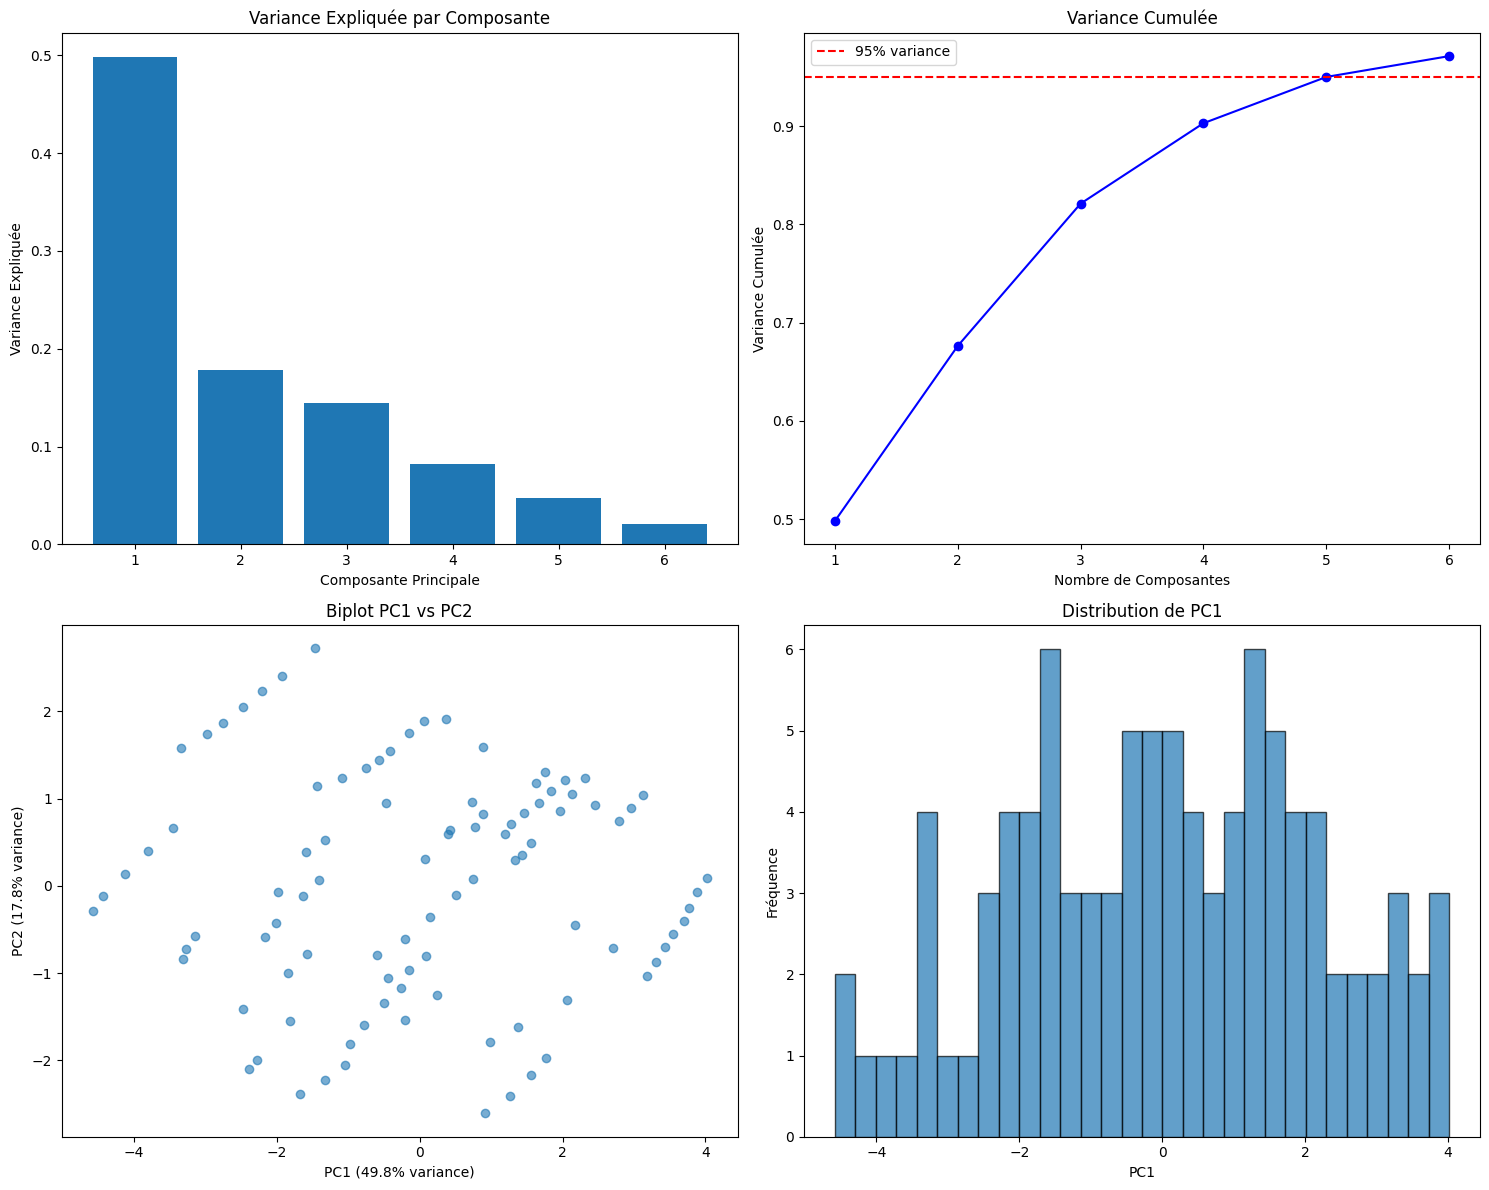

{'n_components': np.int64(6),
 'explained_variance': array([0.49797251, 0.1782095 , 0.14488561, 0.08183924, 0.04708738,
        0.02120054]),
 'cumulative_variance': array([0.49797251, 0.67618202, 0.82106763, 0.90290687, 0.94999425,
        0.9711948 ]),
 'X_train_pca': array([[-1.84249103e+00, -9.97673130e-01,  1.33663499e+00,
         -3.98923701e-01,  1.95790114e-01,  6.17232615e-01],
        [-3.34567716e+00,  1.58070620e+00, -7.32828954e-01,
         -3.32324379e-02, -1.45842757e-01, -5.52284866e-01],
        [-2.47596802e+00,  2.05007147e+00, -1.70374982e-01,
         -4.68821220e-01, -1.28268819e-01, -1.49133785e-01],
        [ 3.43464766e+00, -6.95326404e-01,  2.94945848e-01,
          4.43563626e-01,  1.41039028e-01, -2.66097160e-01],
        [ 1.46488533e+00,  8.32655890e-01,  9.62308597e-01,
          9.15389370e-01,  3.39695602e-01,  7.52633569e-01],
        [ 2.79402790e+00,  7.46881986e-01,  4.52433707e-01,
          8.02554982e-01,  7.49925929e-01,  3.24099995e-01],
    

In [122]:
pipeline_flow.perform_pca()

In [123]:
pipeline_flow.train_models(use_pca=False)

🤖 4. MODÉLISATION SUPERVISÉE
📝 Type de tâche: regression
   Utilisation PCA: Non

🚀 Entraînement des modèles...
   Entraînement SVM...
   ✅ SVM entraîné avec succès
   Entraînement Decision_Tree...
   ✅ Decision_Tree entraîné avec succès
   Entraînement Random_Forest...
   ✅ Random_Forest entraîné avec succès
   Entraînement XGBoost...
   ✅ XGBoost entraîné avec succès

✅ 4 modèles entraînés avec succès!


{'SVM': Pipeline(steps=[('preprocessor', TelecomPreprocessor()),
                 ('scaler', StandardScaler()), ('model', SVR())]),
 'Decision_Tree': Pipeline(steps=[('preprocessor', TelecomPreprocessor()),
                 ('scaler', StandardScaler()),
                 ('model', DecisionTreeRegressor(random_state=42))]),
 'Random_Forest': Pipeline(steps=[('preprocessor', TelecomPreprocessor()),
                 ('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_jobs=-1, random_state=42))]),
 'XGBoost': Pipeline(steps=[('preprocessor', TelecomPreprocessor()),
                 ('scaler', StandardScaler()),
                 ('model',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorica


📊 ÉVALUATION DES MODÈLES
----------------------------------------
SVM             | CV R²: 0.438±0.032 | Test R²: 0.509 | RMSE: 16.741
Decision_Tree   | CV R²: 0.914±0.022 | Test R²: 0.888 | RMSE: 7.994
Random_Forest   | CV R²: 0.951±0.029 | Test R²: 0.946 | RMSE: 5.531
XGBoost         | CV R²: 0.952±0.020 | Test R²: 0.940 | RMSE: 5.841


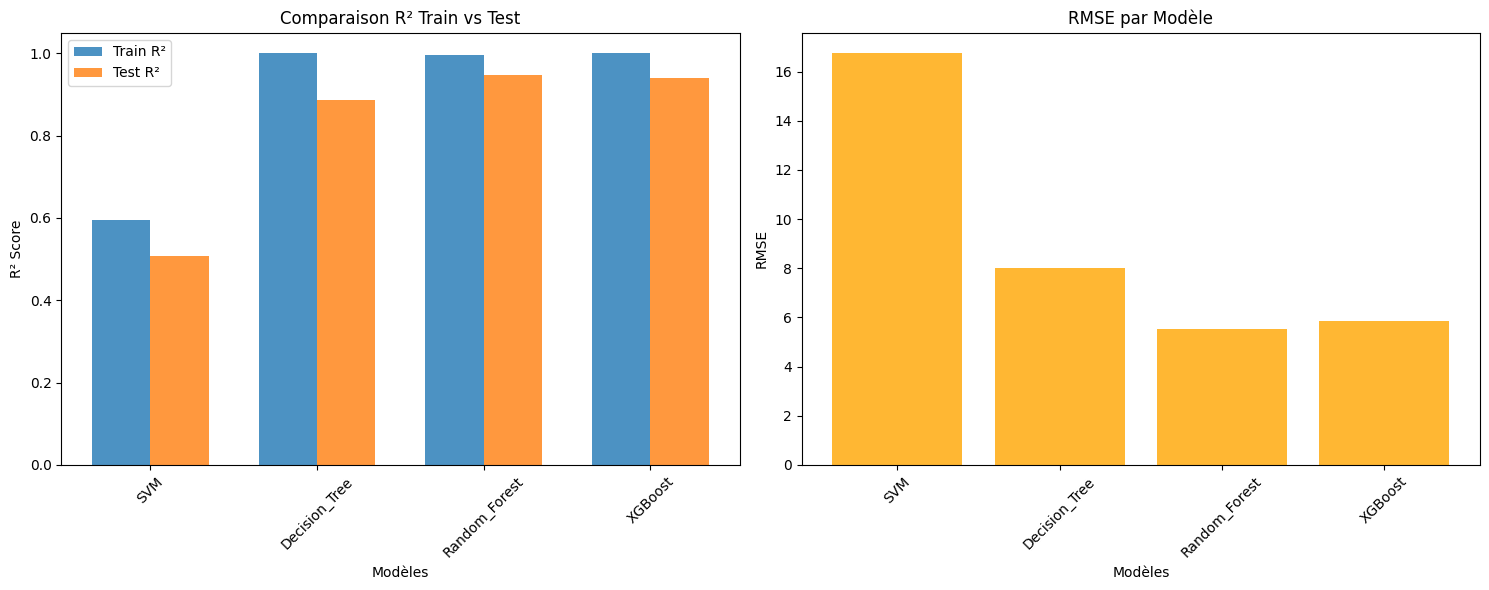

,Model,CV_Score_Mean,CV_Score_Std,Train_R2,Test_R2,RMSE,Overfitting
0,SVM,0.437744,0.031755,0.594165,0.508641,16.741186,0.085524
1,Decision_Tree,0.913842,0.022223,1.000000,0.887970,7.993826,0.112030
2,Random_Forest,0.951170,0.028770,0.995401,0.946360,5.531349,0.049041
3,XGBoost,0.952319,0.020128,1.000000,0.940187,5.840986,0.059813


In [124]:
pipeline_flow.evaluate_models()

In [125]:
pipeline_flow.tune_hyperparameters()

⚙️ 5. TUNING DES HYPERPARAMÈTRES
📊 Configuration tuning:
   Cross-validation: 5 folds
   Métrique: r2
   Jobs parallèles: -1

🔍 Tuning SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
   ✅ Meilleur CV score: 0.986
   📈 Amélioration: +0.549

🔍 Tuning Decision_Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
   ✅ Meilleur CV score: 0.921
   📈 Amélioration: +0.007

🔍 Tuning Random_Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
   ✅ Meilleur CV score: 0.953
   📈 Amélioration: +0.002

🔍 Tuning XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
   ✅ Meilleur CV score: 0.966
   📈 Amélioration: +0.014

✅ Tuning terminé pour 4 modèles!


,Model,Best_CV_Score,Improvement,Best_Params
0,SVM,0.986472,0.548728,"{'model__C': 100, 'model__gamma': 'scale', 'mo..."
1,Decision_Tree,0.920657,0.006815,"{'model__max_depth': 7, 'model__min_samples_le..."
2,Random_Forest,0.952729,0.001560,"{'model__max_depth': None, 'model__min_samples..."
3,XGBoost,0.966190,0.013871,"{'model__learning_rate': 0.1, 'model__max_dept..."


In [126]:
pipeline_flow.evaluate_final_models()


📊 ÉVALUATION FINALE DES MEILLEURS MODÈLES
--------------------------------------------------
SVM             | R² Test: 0.996 | RMSE: 1.529 | Overfit: +0.002
Decision_Tree   | R² Test: 0.836 | RMSE: 9.668 | Overfit: +0.163
Random_Forest   | R² Test: 0.946 | RMSE: 5.569 | Overfit: +0.050
XGBoost         | R² Test: 0.978 | RMSE: 3.549 | Overfit: +0.022


,Model,Train_R2,Test_R2,RMSE,Overfitting
0,SVM,0.998389,0.995903,1.528751,0.002486
1,Decision_Tree,0.999532,0.836134,9.667879,0.163398
2,Random_Forest,0.995132,0.945618,5.569479,0.049514
3,XGBoost,0.999922,0.977912,3.549471,0.022010


🎯 6. SÉLECTION DES VARIABLES

🌲 IMPORTANCES RANDOM_FOREST:
------------------------------
   Feature  Importance
 Feature_4    0.703110
 Feature_2    0.128232
Feature_10    0.104579
 Feature_9    0.031332
 Feature_1    0.012944
Feature_11    0.012660
 Feature_5    0.003297
Feature_13    0.002972
Feature_14    0.000873
 Feature_3    0.000000

🌲 IMPORTANCES XGBOOST:
------------------------------
   Feature  Importance
 Feature_4    0.668198
Feature_10    0.126908
 Feature_2    0.078486
 Feature_9    0.046709
Feature_13    0.026788
Feature_11    0.018522
 Feature_1    0.013063
Feature_14    0.011573
 Feature_5    0.009753
 Feature_3    0.000000


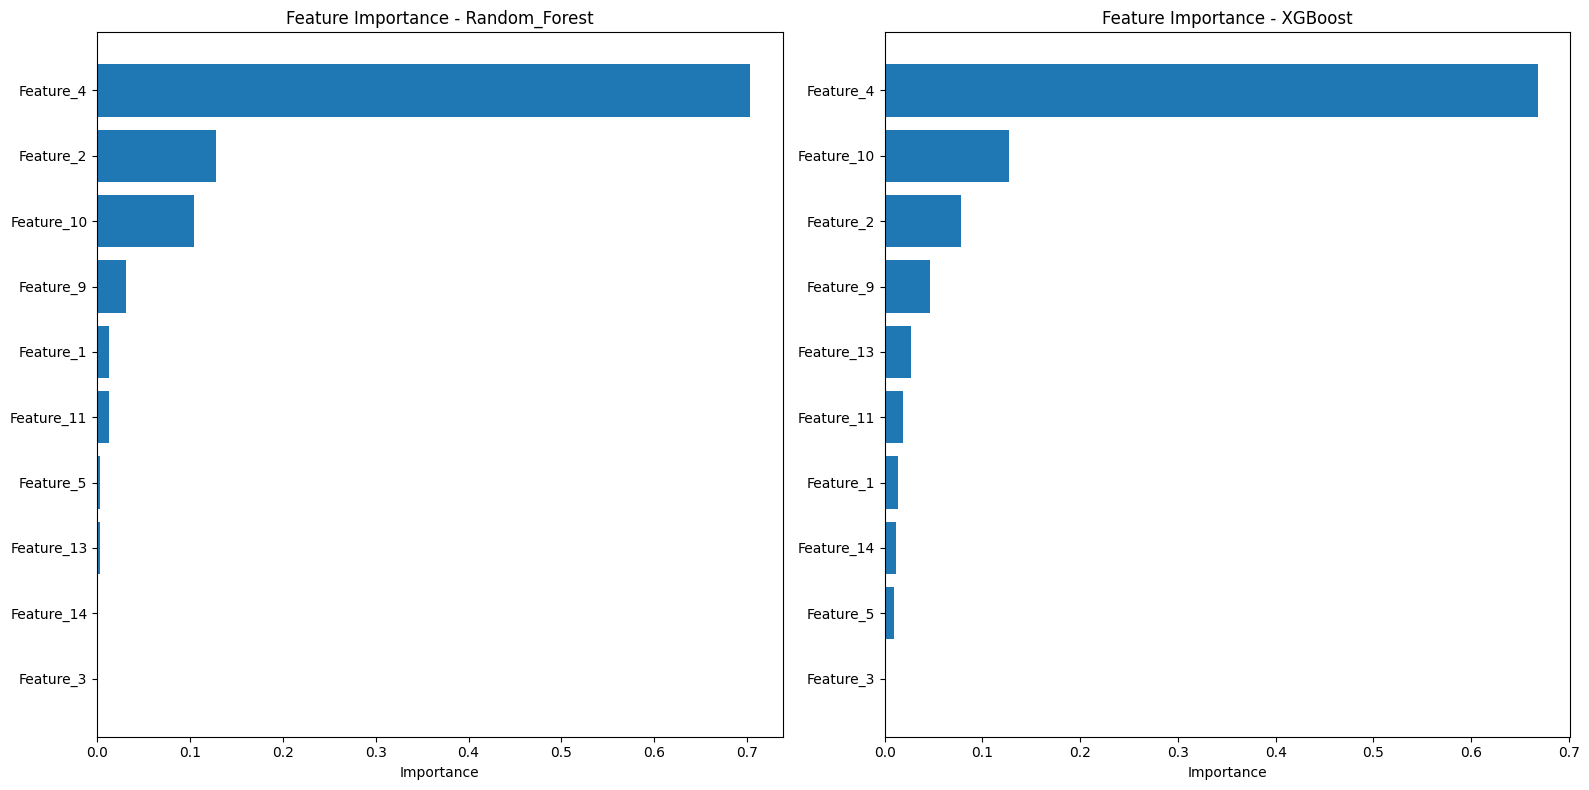

{'Random_Forest':        Feature  Importance
 3    Feature_4    0.703110
 1    Feature_2    0.128232
 9   Feature_10    0.104579
 8    Feature_9    0.031332
 0    Feature_1    0.012944
 10  Feature_11    0.012660
 4    Feature_5    0.003297
 12  Feature_13    0.002972
 13  Feature_14    0.000873
 2    Feature_3    0.000000
 5    Feature_6    0.000000
 7    Feature_8    0.000000
 6    Feature_7    0.000000
 11  Feature_12    0.000000,
 'XGBoost':        Feature  Importance
 3    Feature_4    0.668198
 9   Feature_10    0.126908
 1    Feature_2    0.078486
 8    Feature_9    0.046709
 12  Feature_13    0.026788
 10  Feature_11    0.018522
 0    Feature_1    0.013063
 13  Feature_14    0.011573
 4    Feature_5    0.009753
 2    Feature_3    0.000000
 5    Feature_6    0.000000
 7    Feature_8    0.000000
 6    Feature_7    0.000000
 11  Feature_12    0.000000}

In [127]:
pipeline_flow.select_best_features()

📋 7. RAPPORT FINAL ET RECOMMANDATIONS
🏆 MEILLEUR MODÈLE:
   SVM - R²: 0.996
   Overfitting: +0.002

🎯 ANALYSE DU SURAPPRENTISSAGE:
   SVM             | +0.002 | 🟢 Bon
   Decision_Tree   | +0.163 | 🔴 Élevé
   Random_Forest   | +0.050 | 🟢 Bon
   XGBoost         | +0.022 | 🟢 Bon

💡 RECOMMANDATIONS:

🎯 FEATURES IMPORTANTES:
   Random_Forest: Feature_4 (0.703)
   XGBoost: Feature_4 (0.668)


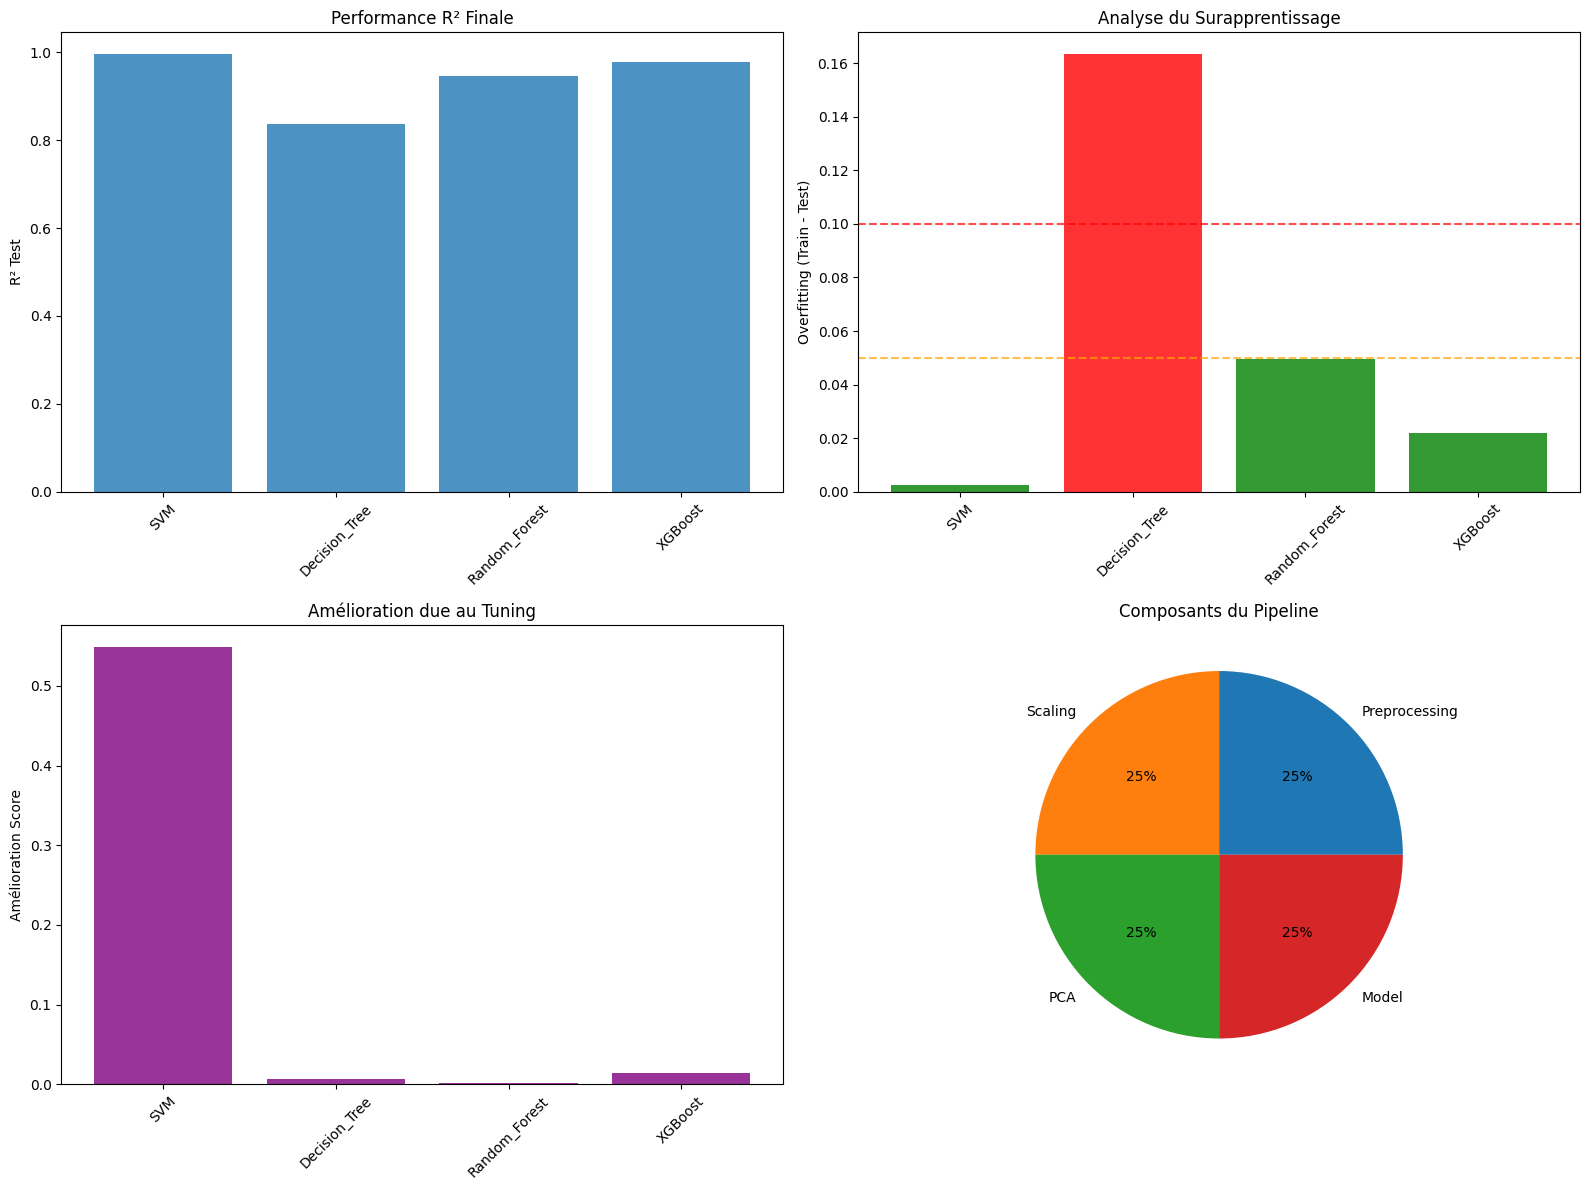


✅ PIPELINE TERMINÉ - Prêt pour la production!


In [128]:
pipeline_flow.generate_final_report()